Python version: 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]
Torch version: 2.6.0+cu124
=== WAV2VEC2 AUDIO CLASSIFICATION TRAINING ===
Mounted at /content/drive
Google Drive connected successfully!
Data found in Drive: /content/drive/MyDrive/MakineOgrenmesiProjesi/Veri_Kumesi
Data copied successfully!
Classes found: ['astim', 'bronşit', 'krup', 'normal', 'zatüre']


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/configuration_utils.py:312: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/380M [00:00<?, ?B/s]

Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at facebook/wav2vec2-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'projector.bias', 'projector.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Device used: cuda
Loading data...
Total data count: 250
Train: 175, Val: 37, Test: 38

Creating model...
Total parameters: 94,569,861
Trainable parameters: 94,569,861


Epoch 1/10 - Training:   0%|          | 0/44 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/380M [00:00<?, ?B/s]

Epoch 1/10 - Validation:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/10: Train Loss: 1.4394, Train Acc: 33.14%, Val Loss: 1.2949, Val Acc: 37.84%
  New best model saved! (Val Acc: 37.84%)


Epoch 2/10 - Training:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch 2/10 - Validation:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 2/10: Train Loss: 1.3647, Train Acc: 34.29%, Val Loss: 1.2175, Val Acc: 37.84%


Epoch 3/10 - Training:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch 3/10 - Validation:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 3/10: Train Loss: 1.3950, Train Acc: 32.57%, Val Loss: 1.1964, Val Acc: 35.14%


Epoch 4/10 - Training:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch 4/10 - Validation:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 4/10: Train Loss: 1.2830, Train Acc: 34.29%, Val Loss: 1.1745, Val Acc: 37.84%


Epoch 5/10 - Training:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch 5/10 - Validation:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 5/10: Train Loss: 1.2382, Train Acc: 32.00%, Val Loss: 1.1653, Val Acc: 37.84%


Epoch 6/10 - Training:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch 6/10 - Validation:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 6/10: Train Loss: 1.2384, Train Acc: 36.57%, Val Loss: 1.1600, Val Acc: 37.84%
Early stopping! No improvement for 5 epochs.

Training time: 2.48 minutes

--- Final Training Metrics ---
Final Train Loss: 1.2384
Final Validation Loss: 1.1600

Loading best model and testing...


Testing:   0%|          | 0/10 [00:00<?, ?it/s]


Classification Report:
              precision    recall  f1-score   support

       astim     0.0000    0.0000    0.0000         8
    bronşit     0.0000    0.0000    0.0000         7
        krup     0.5556    0.6250    0.5882         8
      normal     0.0000    0.0000    0.0000         8
     zatüre     0.2414    1.0000    0.3889         7

    accuracy                         0.3158        38
   macro avg     0.1594    0.3250    0.1954        38
weighted avg     0.1614    0.3158    0.1955        38

Accuracy: 0.3158
Precision: 0.1594
Recall (Sensitivity): 0.3250
Specificity: 0.1594
F1-Score: 0.1954
AUC: 0.6834
Test/Inference time: 2.70 seconds

Training completed!
Best validation accuracy: 37.84%
Best epoch: 0



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model file downloaded: best_wav2vec_model.pth


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Results downloaded: training_results.json


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training graph downloaded: training_history.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Confusion matrix downloaded: confusion_matrix.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ROC curve downloaded: roc_curve.png

All files downloaded successfully!

To use the model:
1. Download best_wav2vec_model.pth file to your computer
2. Use test_model.py script to test new audio files


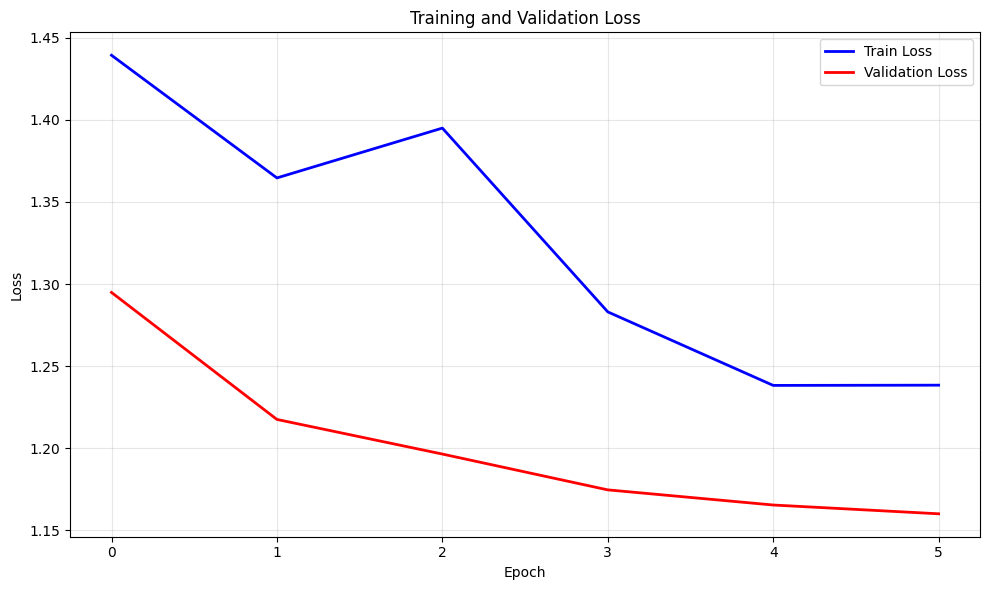

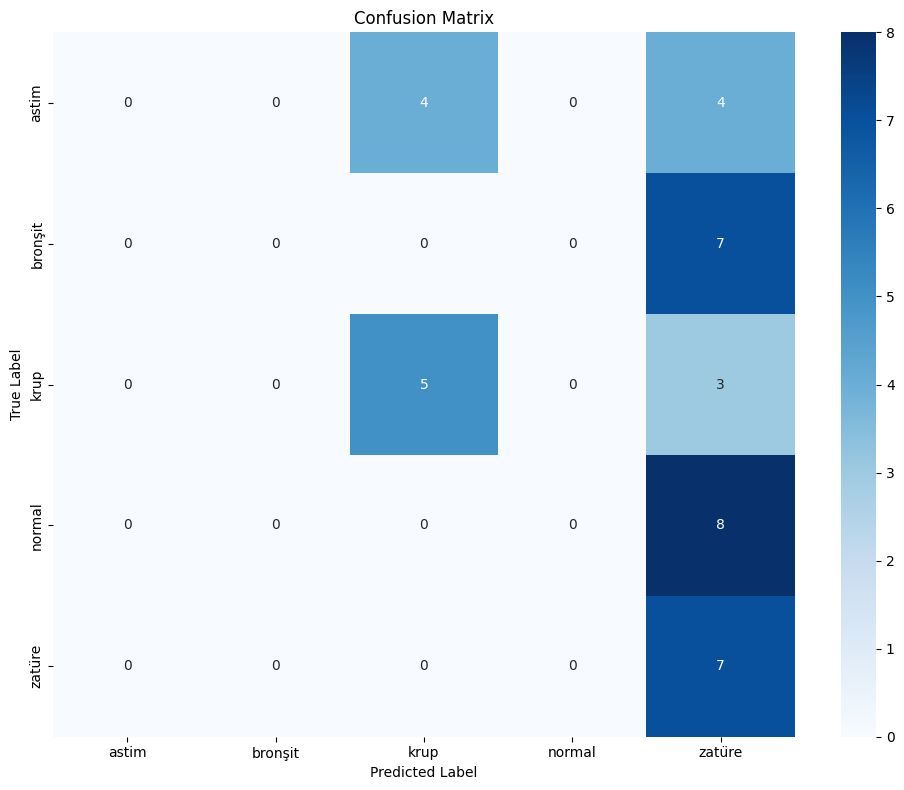

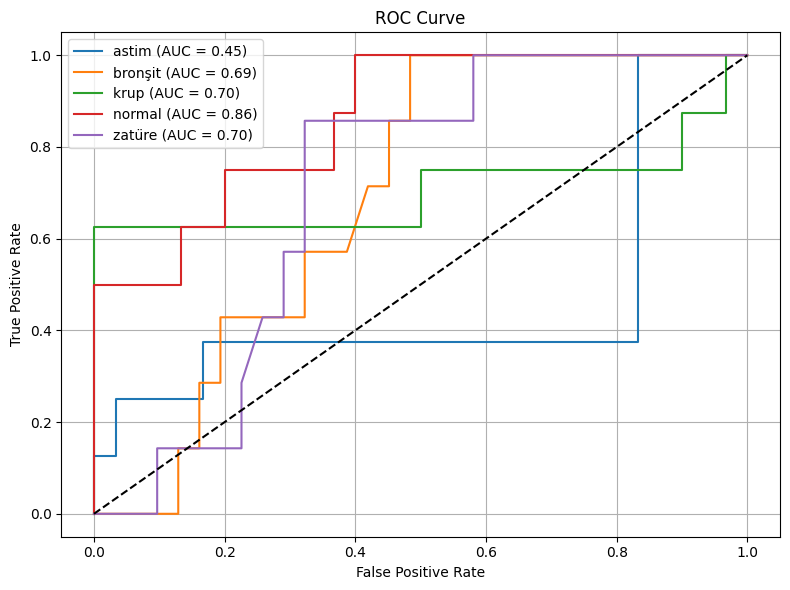

In [1]:
# =========================
# Wav2Vec2 Audio Classification - Google Colab (Modified)
# =========================

import os
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import Wav2Vec2FeatureExtractor, Wav2Vec2ForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_fscore_support, accuracy_score
from sklearn.preprocessing import label_binarize
import torchaudio
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from google.colab import drive, files
import time
import json
import sys
import gc

print("Python version:", sys.version)
print("Torch version:", torch.__version__)

def mount_google_drive():
    try:
        drive.mount('/content/drive')
        print("Google Drive connected successfully!")
        return True
    except Exception as e:
        print(f"Google Drive connection error: {e}")
        return False

def load_data(data_dir, class_names):
    data_paths = []
    labels = []
    for class_idx, class_name in enumerate(class_names):
        class_dir = os.path.join(data_dir, class_name)
        if os.path.exists(class_dir):
            for file_name in os.listdir(class_dir):
                if file_name.endswith('.wav'):
                    file_path = os.path.join(class_dir, file_name)
                    data_paths.append(file_path)
                    labels.append(class_idx)
    return data_paths, labels

class AudioWavDataset(Dataset):
    def __init__(self, data_paths, labels):
        self.data_paths = data_paths
        self.labels = labels
    def __len__(self):
        return len(self.data_paths)
    def __getitem__(self, idx):
        wav, sr = torchaudio.load(self.data_paths[idx])
        wav = wav.mean(dim=0)  # mono
        # Resample to 16kHz for Wav2Vec2
        if sr != 16000:
            wav = torchaudio.transforms.Resample(orig_freq=sr, new_freq=16000)(wav)
        label = self.labels[idx]
        return wav, label

def collate_fn(batch):
    wavs, labels = zip(*batch)
    wavs = [w.numpy() for w in wavs]
    inputs = feature_extractor(wavs, sampling_rate=16000, return_tensors="pt", padding=True)
    labels = torch.tensor(labels)
    return inputs, labels

def train_model(model, train_loader, val_loader, num_epochs, device, learning_rate=5e-5, patience=5):
    optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
    best_val_acc = 0.0
    patience_counter = 0
    train_losses, val_losses = [], []
    for epoch in range(num_epochs):
        model.train()
        train_loss, train_correct, train_total = 0.0, 0, 0
        for batch in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs} - Training'):
            inputs, labels = batch
            inputs = {k: v.to(device) for k, v in inputs.items()}
            labels = labels.to(device)
            optimizer.zero_grad()
            outputs = model(**inputs, labels=labels)
            loss = outputs.loss
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            _, predicted = torch.max(outputs.logits.data, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()
        train_acc = 100 * train_correct / train_total
        avg_train_loss = train_loss / len(train_loader)
        # Validation
        model.eval()
        val_loss, val_correct, val_total = 0.0, 0, 0
        with torch.no_grad():
            for batch in tqdm(val_loader, desc=f'Epoch {epoch+1}/{num_epochs} - Validation'):
                inputs, labels = batch
                inputs = {k: v.to(device) for k, v in inputs.items()}
                labels = labels.to(device)
                outputs = model(**inputs, labels=labels)
                loss = outputs.loss
                val_loss += loss.item()
                _, predicted = torch.max(outputs.logits.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
        val_acc = 100 * val_correct / val_total
        avg_val_loss = val_loss / len(val_loader)
        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)
        print(f'Epoch {epoch+1}/{num_epochs}: Train Loss: {avg_train_loss:.4f}, Train Acc: {train_acc:.2f}%, Val Loss: {avg_val_loss:.4f}, Val Acc: {val_acc:.2f}%')
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            patience_counter = 0
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'val_acc': val_acc,
                'class_names': class_names,
                'config': config
            }, 'best_wav2vec_model.pth')
            print(f'  New best model saved! (Val Acc: {val_acc:.2f}%)')
        else:
            patience_counter += 1
        gc.collect()
        torch.cuda.empty_cache()
        if patience_counter >= patience:
            print(f'Early stopping! No improvement for {patience} epochs.')
            break
    return train_losses, val_losses

def evaluate_model(model, test_loader, device, class_names, return_probs=False):
    model.eval()
    all_predictions, all_labels, all_probs = [], [], []
    with torch.no_grad():
        for batch in tqdm(test_loader, desc='Testing'):
            inputs, labels = batch
            inputs = {k: v.to(device) for k, v in inputs.items()}
            labels = labels.to(device)
            outputs = model(**inputs)
            probs = torch.softmax(outputs.logits, dim=1)
            _, predicted = torch.max(probs.data, 1)
            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())
    # Metrics
    print("\nClassification Report:")
    print(classification_report(
        all_labels, all_predictions,
        labels=list(range(len(class_names))),
        target_names=class_names,
        digits=4,
        zero_division=0
    ))
    acc = accuracy_score(all_labels, all_predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(
        all_labels, all_predictions, average='macro', labels=list(range(len(class_names))), zero_division=0)
    cm = confusion_matrix(all_labels, all_predictions, labels=list(range(len(class_names))))
    sensitivity = recall
    specificity = np.mean([cm[i,i]/(cm[:,i].sum() if cm[:,i].sum()>0 else 1) for i in range(len(class_names))])
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall (Sensitivity): {recall:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"F1-Score: {f1:.4f}")
    # ROC and AUC
    y_true_bin = label_binarize(all_labels, classes=list(range(len(class_names))))
    auc = roc_auc_score(y_true_bin, np.array(all_probs), average='macro', multi_class='ovr')
    print(f"AUC: {auc:.4f}")
    # Confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.savefig('confusion_matrix.png')
    # plt.show()
    # ROC curves
    plt.figure(figsize=(8, 6))
    for i in range(len(class_names)):
        if np.sum(y_true_bin[:, i]) == 0:
            print(f"Warning: No '{class_names[i]}' class in test set, ROC curve cannot be drawn.")
            continue
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], np.array(all_probs)[:, i])
        auc_score = roc_auc_score(y_true_bin[:, i], np.array(all_probs)[:, i])
        plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {auc_score:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('roc_curve.png')
    # plt.show()
    if return_probs:
        return all_predictions, all_labels, all_probs
    else:
        return all_predictions, all_labels

def plot_training_history(train_losses, val_losses):
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Train Loss', color='blue', linewidth=2)
    plt.plot(val_losses, label='Validation Loss', color='red', linewidth=2)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('training_history.png')
    # plt.show()

print("=== WAV2VEC2 AUDIO CLASSIFICATION TRAINING ===")
if not mount_google_drive():
    raise RuntimeError("Could not connect to Google Drive!")

drive_data_path = '/content/drive/MyDrive/MakineOgrenmesiProjesi/Veri_Kumesi'
if os.path.exists(drive_data_path):
    print(f"Data found in Drive: {drive_data_path}")
    os.system(f'cp -r "{drive_data_path}" ./data')
    print("Data copied successfully!")
else:
    raise RuntimeError("Could not find 'Veri_Kumesi' folder in Google Drive!")

class_names = sorted([d for d in os.listdir('data') if os.path.isdir(os.path.join('data', d))])
print("Classes found:", class_names)

config = {
    'batch_size': 4,
    'num_epochs': 10,
    'learning_rate': 5e-5,
    'random_seed': 42,
    'early_stopping_patience': 5
}

feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained("facebook/wav2vec2-base")
model = Wav2Vec2ForSequenceClassification.from_pretrained(
    "facebook/wav2vec2-base",
    num_labels=len(class_names),
    problem_type="single_label_classification"
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Device used: {device}')
model.to(device)

torch.manual_seed(config['random_seed'])
np.random.seed(config['random_seed'])

print("Loading data...")
data_paths, labels = load_data('data', class_names)
print("Total data count:", len(data_paths))

if len(data_paths) == 0:
    print("Error: No data found in data directory!")
    raise RuntimeError("No data found!")
else:
    train_paths, temp_paths, train_labels, temp_labels = train_test_split(
        data_paths, labels, test_size=0.3, random_state=config['random_seed'], stratify=labels
    )
    val_paths, test_paths, val_labels, test_labels = train_test_split(
        temp_paths, temp_labels, test_size=0.5, random_state=config['random_seed'], stratify=temp_labels
    )
    print(f"Train: {len(train_paths)}, Val: {len(val_paths)}, Test: {len(test_paths)}")
    train_dataset = AudioWavDataset(train_paths, train_labels)
    val_dataset = AudioWavDataset(val_paths, val_labels)
    test_dataset = AudioWavDataset(test_paths, test_labels)
    train_loader = DataLoader(train_dataset, batch_size=config['batch_size'], shuffle=True, collate_fn=collate_fn)
    val_loader = DataLoader(val_dataset, batch_size=config['batch_size'], shuffle=False, collate_fn=collate_fn)
    test_loader = DataLoader(test_dataset, batch_size=config['batch_size'], shuffle=False, collate_fn=collate_fn)
    print("\nCreating model...")
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"Total parameters: {total_params:,}")
    print(f"Trainable parameters: {trainable_params:,}")

    train_start = time.time()
    train_losses, val_losses = train_model(
        model, train_loader, val_loader,
        config['num_epochs'], device,
        config['learning_rate'],
        config['early_stopping_patience']
    )
    train_end = time.time()
    print(f"\nTraining time: {(train_end-train_start)/60:.2f} minutes")

    print("\n--- Final Training Metrics ---")
    print(f"Final Train Loss: {train_losses[-1]:.4f}")
    print(f"Final Validation Loss: {val_losses[-1]:.4f}")

    plot_training_history(train_losses, val_losses)

    print("\nLoading best model and testing...")
    checkpoint = torch.load('best_wav2vec_model.pth', map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'])
    inference_start = time.time()
    predictions, true_labels, y_probs = evaluate_model(model, test_loader, device, class_names, return_probs=True)
    inference_end = time.time()
    print(f"Test/Inference time: {(inference_end-inference_start):.2f} seconds")

    results = {
        'best_val_acc': float(checkpoint['val_acc']),
        'best_epoch': int(checkpoint['epoch']),
        'class_names': class_names,
        'config': config,
        'test_predictions': [int(x) for x in predictions],
        'test_labels': [int(x) for x in true_labels]
    }
    with open('training_results.json', 'w', encoding='utf-8') as f:
        json.dump(results, f, indent=2, ensure_ascii=False)
    print(f"\nTraining completed!")
    print(f"Best validation accuracy: {checkpoint['val_acc']:.2f}%")
    print(f"Best epoch: {checkpoint['epoch']}")
    print("\nDownloading trained model and results...")
    if os.path.exists('best_wav2vec_model.pth'):
        files.download('best_wav2vec_model.pth')
        print("Model file downloaded: best_wav2vec_model.pth")
    if os.path.exists('training_results.json'):
        files.download('training_results.json')
        print("Results downloaded: training_results.json")
    if os.path.exists('training_history.png'):
        files.download('training_history.png')
        print("Training graph downloaded: training_history.png")
    if os.path.exists('confusion_matrix.png'):
        files.download('confusion_matrix.png')
        print("Confusion matrix downloaded: confusion_matrix.png")
    if os.path.exists('roc_curve.png'):
        files.download('roc_curve.png')
        print("ROC curve downloaded: roc_curve.png")
    print("\nAll files downloaded successfully!")
    print("\nTo use the model:")
    print("1. Download best_wav2vec_model.pth file to your computer")
    print("2. Use test_model.py script to test new audio files")